# Introduction
---


In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
cars_df = pd.read_csv('/Users/User2/car_sales_data/vehicles_us.csv')
cars_df.info()
#`date_posted` data type is object, we'll change it to datetime
#also should add a date_sold column 
#switch 'type' from object to category 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
cars_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
#checking for duplicates
cars_df.duplicated().sum()

0

In [5]:
#let's check for missing values
cars_df.isna().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
cars_df['type'] = cars_df['type'].astype('category')

In [8]:
cars_df['date_posted'] = pd.to_datetime(cars_df['date_posted']).dt.to_period('M')

In [96]:
cars_df['make'] = cars_df['model'].apply(lambda x: x.split()[0] if pd.notna(x) else '')
cars_df['make'].unique()


array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

In [16]:
cars_df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted        12
days_listed       227
dtype: int64

Dataset consists of sales of 100 unique car models

In [94]:
#We'll group this data to get model average sales price 
avg_price = cars_df.groupby('make').agg({'price':'mean'}).reset_index()
fig_1 = px.scatter(x=avg_price['make'], y=avg_price['price'])
fig_1.show()



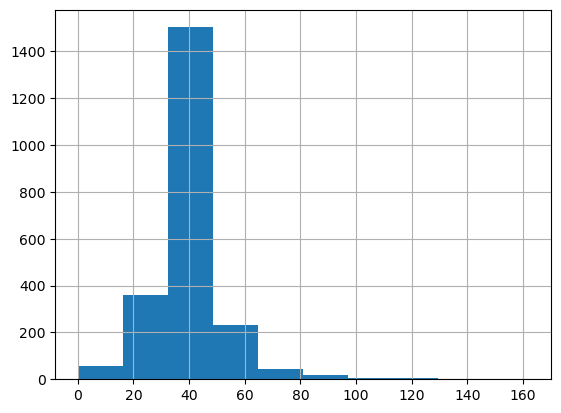

In [81]:
txt = "welcome to the jungle"

x = txt.split()

print(x)

['welcome', 'to', 'the', 'jungle']
